### Data Visualisation

1. Overall highest rated movies: Movie vs Rating * Votes
2. Highest rated movies: Movie vs Rating
3. Ideal run time: Overall Rating vs Run Time 
4. Top genres: Genre vs Votes
5. Most common year for movie debut: Movie vs Year
6. Longest running movies: Movie vs Start-End Year
7. Top Gross Movies
8. Highest Rated Directors

In [155]:
# Import Libraries
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [156]:
# Import Clean Data
df = pd.read_json('Data/cleaned_movies.json', orient='records')
df = df.astype({'Movies': 'object',
                          'Start Year': 'Int32',
                          'End Year': 'Int32',
                          'Genre': 'object',
                          'Rating': 'float64',
                          'Short Desc': 'object',
                          'Stars': 'object',
                          'Votes': 'Int32',
                          'Run Time': 'float64',
                          'Gross': 'float64'})

In [157]:
display(df.head())
df.info()

,Movies,Start Year,End Year,Genre,Rating,Short Desc,Votes,Run Time,Gross,Directors,Stars
0,Blood Red Sky,2021,<NA>,"[Action, Horror, Thriller]",6.10,A woman with a mysterious illness is forced in...,21062,121.0,NaN,[Peter Thorwarth],"[Peri Baumeister, Carl Anton Koch, Alexander S..."
1,Masters of the Universe: Revelation,2021,<NA>,"[Animation, Action, Adventure]",5.00,The war for Eternia begins again in what may b...,17870,25.0,NaN,[None],"[Chris Wood, Sarah Michelle Gellar, Lena Heade..."
2,The Walking Dead,2010,2022,"[Drama, Horror, Thriller]",8.20,Sheriff Deputy Rick Grimes wakes up from a com...,885805,44.0,NaN,[None],"[Andrew Lincoln, Norman Reedus, Melissa Mc Bri..."
3,Rick and Morty,2013,<NA>,"[Animation, Adventure, Comedy]",9.20,An animated series that follows the exploits o...,414849,23.0,NaN,[None],"[Justin Roiland, Chris Parnell, Spencer Gramme..."
4,Army of Thieves,2021,<NA>,"[Action, Crime, Horror]",6.92,"A prequel, set before the events of Army of th...",15144,NaN,NaN,[Matthias Schweighöfer],"[Matthias Schweighöfer, Nathalie Emmanuel, Rub..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9026 entries, 0 to 9025
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Movies      9026 non-null   object 
 1   Start Year  8933 non-null   Int32  
 2   End Year    1371 non-null   Int32  
 3   Genre       8989 non-null   object 
 4   Rating      9026 non-null   float64
 5   Short Desc  9026 non-null   object 
 6   Votes       9026 non-null   Int32  
 7   Run Time    6987 non-null   float64
 8   Gross       460 non-null    float64
 9   Directors   9026 non-null   object 
 10  Stars       9026 non-null   object 
dtypes: Int32(3), float64(3), object(5)
memory usage: 696.5+ KB


In [158]:
plots = []

,Movies,Rating,Votes,Overall Rating
16,Breaking Bad,9.4,1552311,9.376037
129,Avatar: The Last Airbender,9.3,265845,9.171714
3,Rick and Morty,9.2,414849,9.119691
104,Sherlock,9.1,839029,9.061345
820,Cosmos: A Spacetime Odyssey,9.3,114386,9.021710
228,Death Note: Desu nôto,9.0,262556,8.886555
193,The Lord of the Rings: The Return of the King,8.9,1691777,8.882431
247,Hagane no renkinjutsushi,9.1,134855,8.879878
39,Shingeki no kyojin,9.0,242582,8.877763
21,Friends,8.9,880918,8.866532


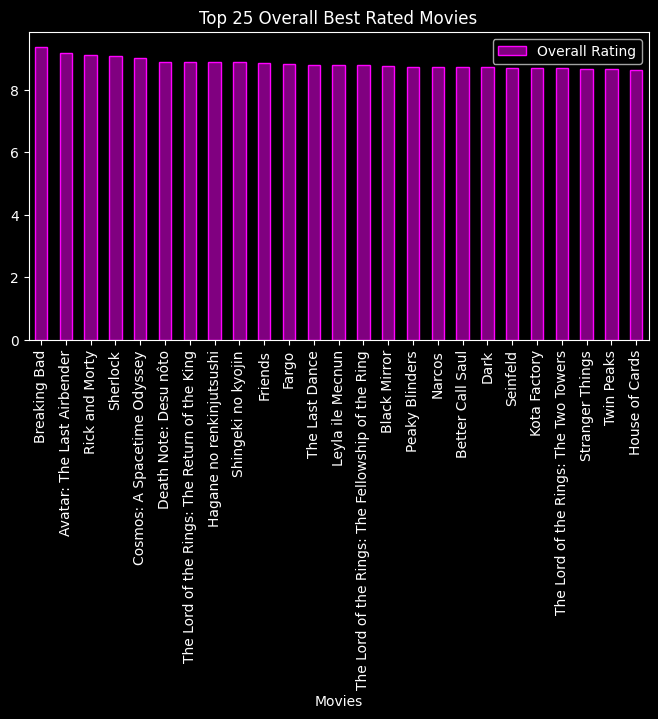

In [159]:
# 1. Overall highest rated movies
df_view_1 = df[['Movies', 'Rating', 'Votes']].copy()
C = df_view_1['Rating'].mean()
m = df_view_1['Votes'].quantile(0.80)

def weighted_rating(row, C, m):
    R, v = row['Rating'], row['Votes']
    return (v / (v + m)) * R + (m / (v + m)) * C

df_view_1['Overall Rating'] = df_view_1.apply(weighted_rating, axis=1, args=(C, m))

df_view_1 = df_view_1.sort_values(by='Overall Rating', ascending=False)

show_rows = 10
display(df_view_1.head(show_rows))

fig1, ax1 = plt.subplots(figsize=(8, 4))
df_view_1.head(25).plot(kind='bar', x='Movies', y='Overall Rating', color='purple', edgecolor='magenta', figsize=(8, 4), title='Top 25 Overall Best Rated Movies', ax=ax1)
plots.append(fig1)

,Movies,Rating
7930,Avatar: The Last Airbender,9.9
7125,BoJack Horseman,9.9
8967,Dexter,9.8
7929,Avatar: The Last Airbender,9.8
8048,She-Ra and the Princesses of Power,9.7
7961,The Midnight Gospel,9.7
8056,She-Ra and the Princesses of Power,9.7
8185,Dark,9.7
6684,Avatar: The Last Airbender,9.7
8075,Meerkat Manor,9.6


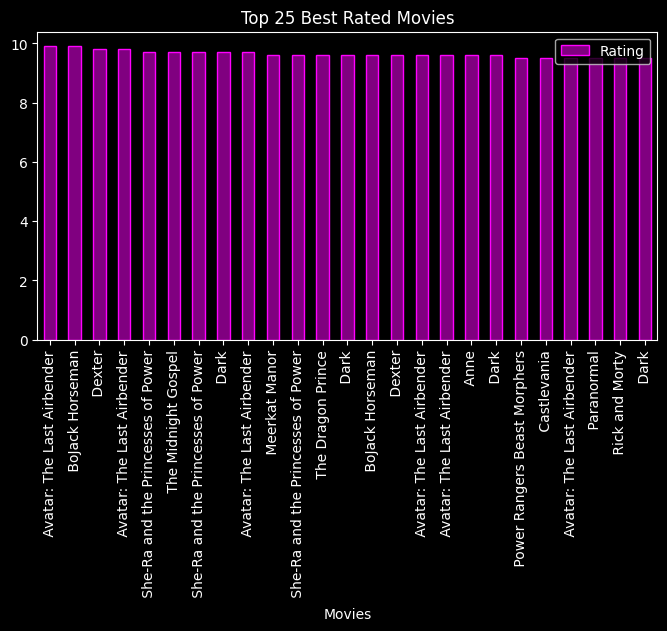

In [160]:
# 2. Highest rated movies
df_view_2 = df[['Movies', 'Rating']].copy()
df_view_2 = df_view_2.sort_values(by='Rating', ascending=False)

display(df_view_2.head(show_rows))

fig2, ax2 = plt.subplots(figsize=(8, 4))
df_view_2.head(25).plot(kind='bar', x='Movies', y='Rating', color='purple', edgecolor='magenta', figsize=(8, 4), title='Top 25 Best Rated Movies', ax=ax2)
plots.append(fig2)

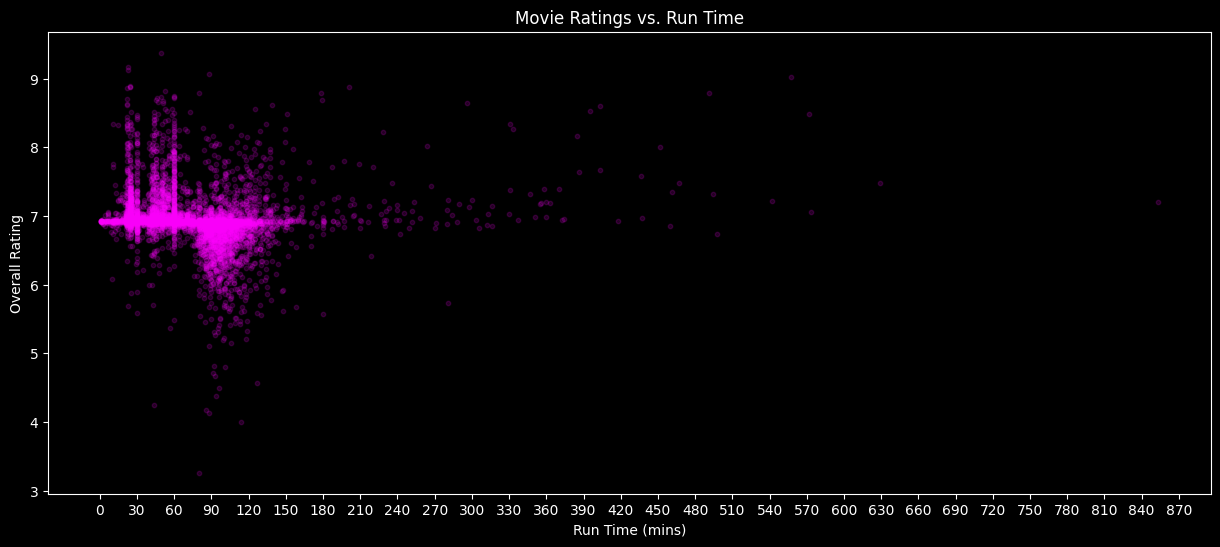

In [161]:
# 3. Ideal Run time
df_view_3 = df[['Movies', 'Run Time']].copy()
df_view_3['Overall Rating'] = df_view_1['Overall Rating'].copy()

# 1) Bin run times
df_view_3['Run Time Bin'] = (df_view_3['Run Time'] // 20) * 20

# 2) Compute mean rating in each bin
df_grouped = df_view_3.groupby('Run Time Bin', as_index=False)['Overall Rating'].mean()

fig3, ax3 = plt.subplots(figsize=(15,6))
ax3.scatter(
    df_view_3['Run Time'],
    df_view_3['Overall Rating'],
    alpha=0.15,
    s=10,
    color='magenta'
)
ax3.set_xlabel('Run Time (mins)')
ax3.set_ylabel('Overall Rating')
ax3.set_title('Movie Ratings vs. Run Time')
ax3.set_xticks([i for i in range(0, 900, 30)])
ax3.grid(False)
plots.append(fig3)

,Genre,Votes
0,Sci-Fi,44096.882562
1,Adventure,25494.44194
2,Thriller,24545.676996
3,Fantasy,24473.468813
4,Crime,24020.383139
5,Action,23124.033216
6,Biography,22868.533557
7,War,22282.978261
8,Horror,22006.4846
9,Musical,20886.875


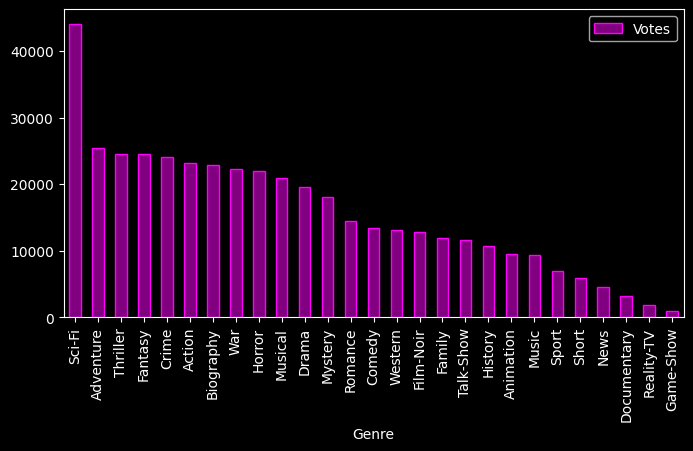

In [162]:
# 4. Top Popular Genres
df_view_4 = df[['Genre', 'Votes']].copy()
df_view_4 = df_view_4.explode('Genre')
df_view_4 = df_view_4.groupby('Genre')['Votes'].mean().reset_index()
df_view_4 = df_view_4.sort_values(by='Votes', ascending=False)

display(df_view_4.head(show_rows).reset_index(drop=True))

fig4, ax4 = plt.subplots(figsize=(8, 4))
df_view_4.plot(kind='bar', x='Genre', y='Votes', color='purple', edgecolor='magenta', figsize=(8, 4), ax=ax4)
plots.append(fig4)

,Start Year,Movies
0,1932,2
1,1933,1
2,1938,1
3,1941,1
4,1944,1
5,1945,3
6,1946,3
7,1947,1
8,1948,2
9,1950,4


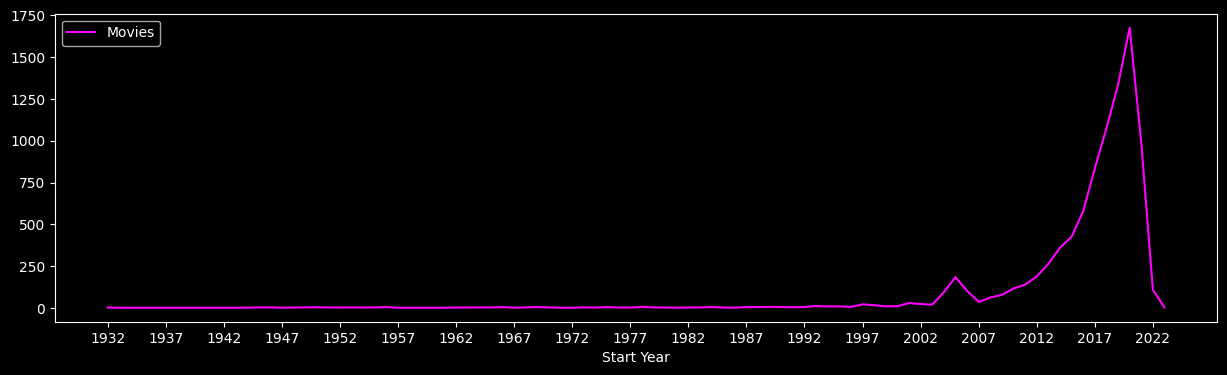

In [163]:
# 5. Most common start year
df_view_5 = df[['Start Year', 'Movies']].copy()
df_view_5 = df_view_5.groupby('Start Year')['Movies'].count().reset_index()
df_view_5 = df_view_5.sort_values(by='Start Year', ascending=True)

display(df_view_5.head(show_rows).reset_index(drop=True))

fig5, ax5 = plt.subplots(figsize=(15, 4))
df_view_5.plot(x='Start Year', y='Movies', color='magenta',figsize=(15, 4), xticks=[i for i in range(1932, 2023, 5)], ax=ax5)
plots.append(fig5)

,Movies,Start Year,End Year,Years
0,Thomas the Tank Engine & Friends,1984,2021,37
1,Family Guy,1999,2022,23
2,Will & Grace,1998,2020,22
3,Men Behaving Badly,1992,2014,22
4,Trailer Park Boys,2001,2018,17
5,Still Game,2002,2019,17
6,Arrested Development,2003,2019,16
7,Keeping Up with the Kardashians,2006,2021,15
8,Supernatural,2005,2020,15
9,CSI: Crime Scene Investigation,2000,2015,15


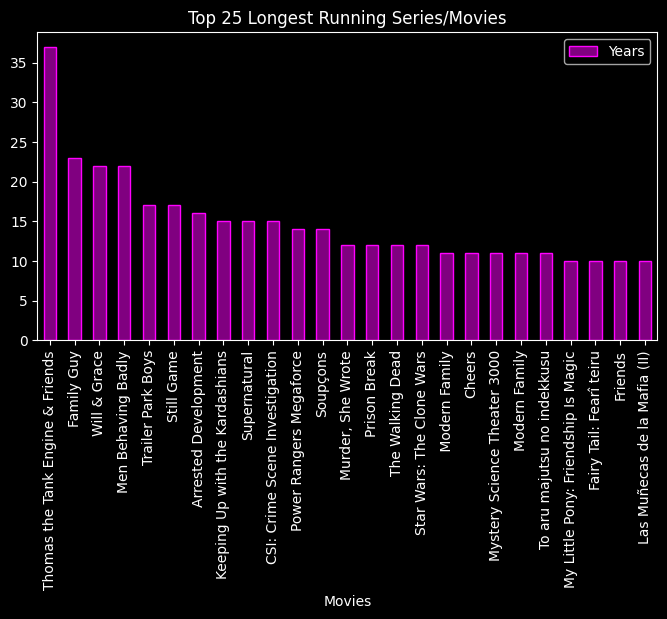

In [164]:
# 6. Longest running movies: Movie vs Start-End Year
df_view_6 = df[['Movies', 'Start Year', 'End Year']].copy()
df_view_6['Years'] = df_view_6['End Year'] - df_view_6['Start Year']
df_view_6 = df_view_6.sort_values(by='Years', ascending=False)

display(df_view_6.head(show_rows).reset_index(drop=True))

fig6, ax6 = plt.subplots(figsize=(8, 4))
df_view_6.head(25).plot(kind='bar', x='Movies', y='Years', color='purple', edgecolor='magenta', figsize=(8, 4), title='Top 25 Longest Running Series/Movies', ax=ax6)
plots.append(fig6)

,Movies,Gross
0,Beauty and the Beast,504.01
1,Finding Dory,486.30
2,Captain America: Civil War,408.08
3,Jumanji: Welcome to the Jungle,404.52
4,Spider-Man,403.71
5,Jurassic Park,402.45
6,Frozen,400.74
7,Spider-Man: Far from Home,390.53
8,The Lord of the Rings: The Return of the King,377.85
9,Despicable Me 2,368.06


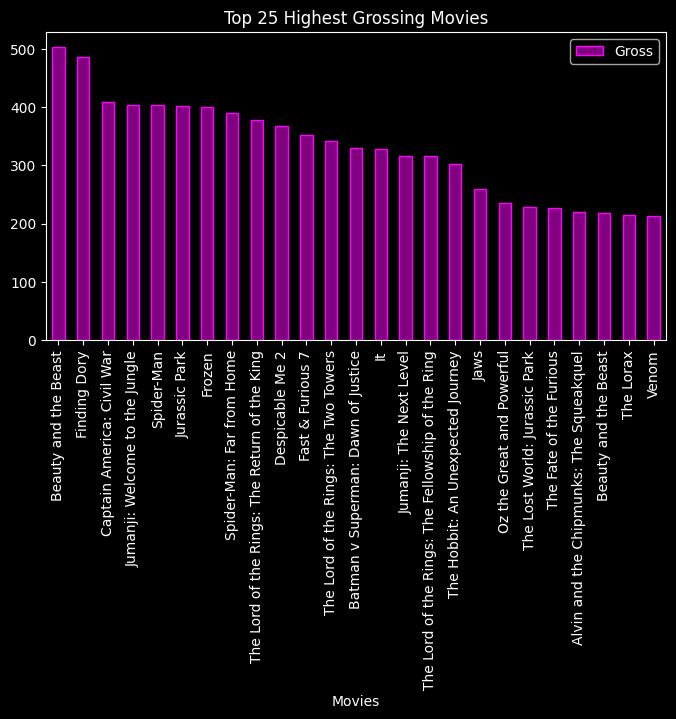

In [165]:
# 7. Highest Grossing Movies
df_view_7 = df[['Movies', 'Gross']].copy()
df_view_7 = df_view_7.sort_values(by='Gross', ascending=False)

display(df_view_7.head(show_rows).reset_index(drop=True))

fig7, ax7 = plt.subplots(figsize=(8, 4))
df_view_7.head(25).plot(kind='bar', x='Movies', y='Gross', color='purple', edgecolor='magenta', figsize=(8, 4), title='Top 25 Highest Grossing Movies', ax=ax7)
plots.append(fig7)

,Directors,Overall Rating
0,Murat Dündar,8.620674
1,Star: David Attenborough,8.601648
2,Peter Jackson,8.532906
3,Makoto Shinkai,8.303614
4,Directors: Alastair Fothergill,8.277257
5,Jonathan Hughes,8.277257
6,Robert Mulligan,8.234005
7,David Lean,8.228353
8,Directors: Terry Gilliam,8.163310
9,Terry Jones,8.108930


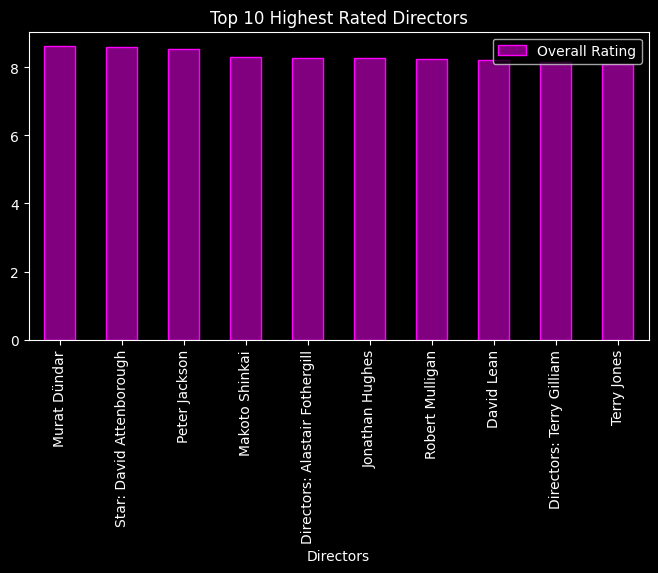

In [166]:
# 8. Highest Rated Directors
df_view_8 = df[['Directors']].copy()
df_view_8['Overall Rating'] = df_view_1['Overall Rating'].copy()
df_view_8 = df_view_8.explode('Directors')
df_view_8 = df_view_8.groupby('Directors')['Overall Rating'].mean().reset_index()
df_view_8 = df_view_8.sort_values(by='Overall Rating', ascending=False)

display(df_view_8.head(show_rows).reset_index(drop=True))

fig8, ax8 = plt.subplots(figsize=(8, 4))
df_view_8.head(10).plot(kind='bar', x='Directors', y='Overall Rating', color='purple', edgecolor='magenta', figsize=(8, 4), title='Top 10 Highest Rated Directors', ax=ax8)
plots.append(fig8)

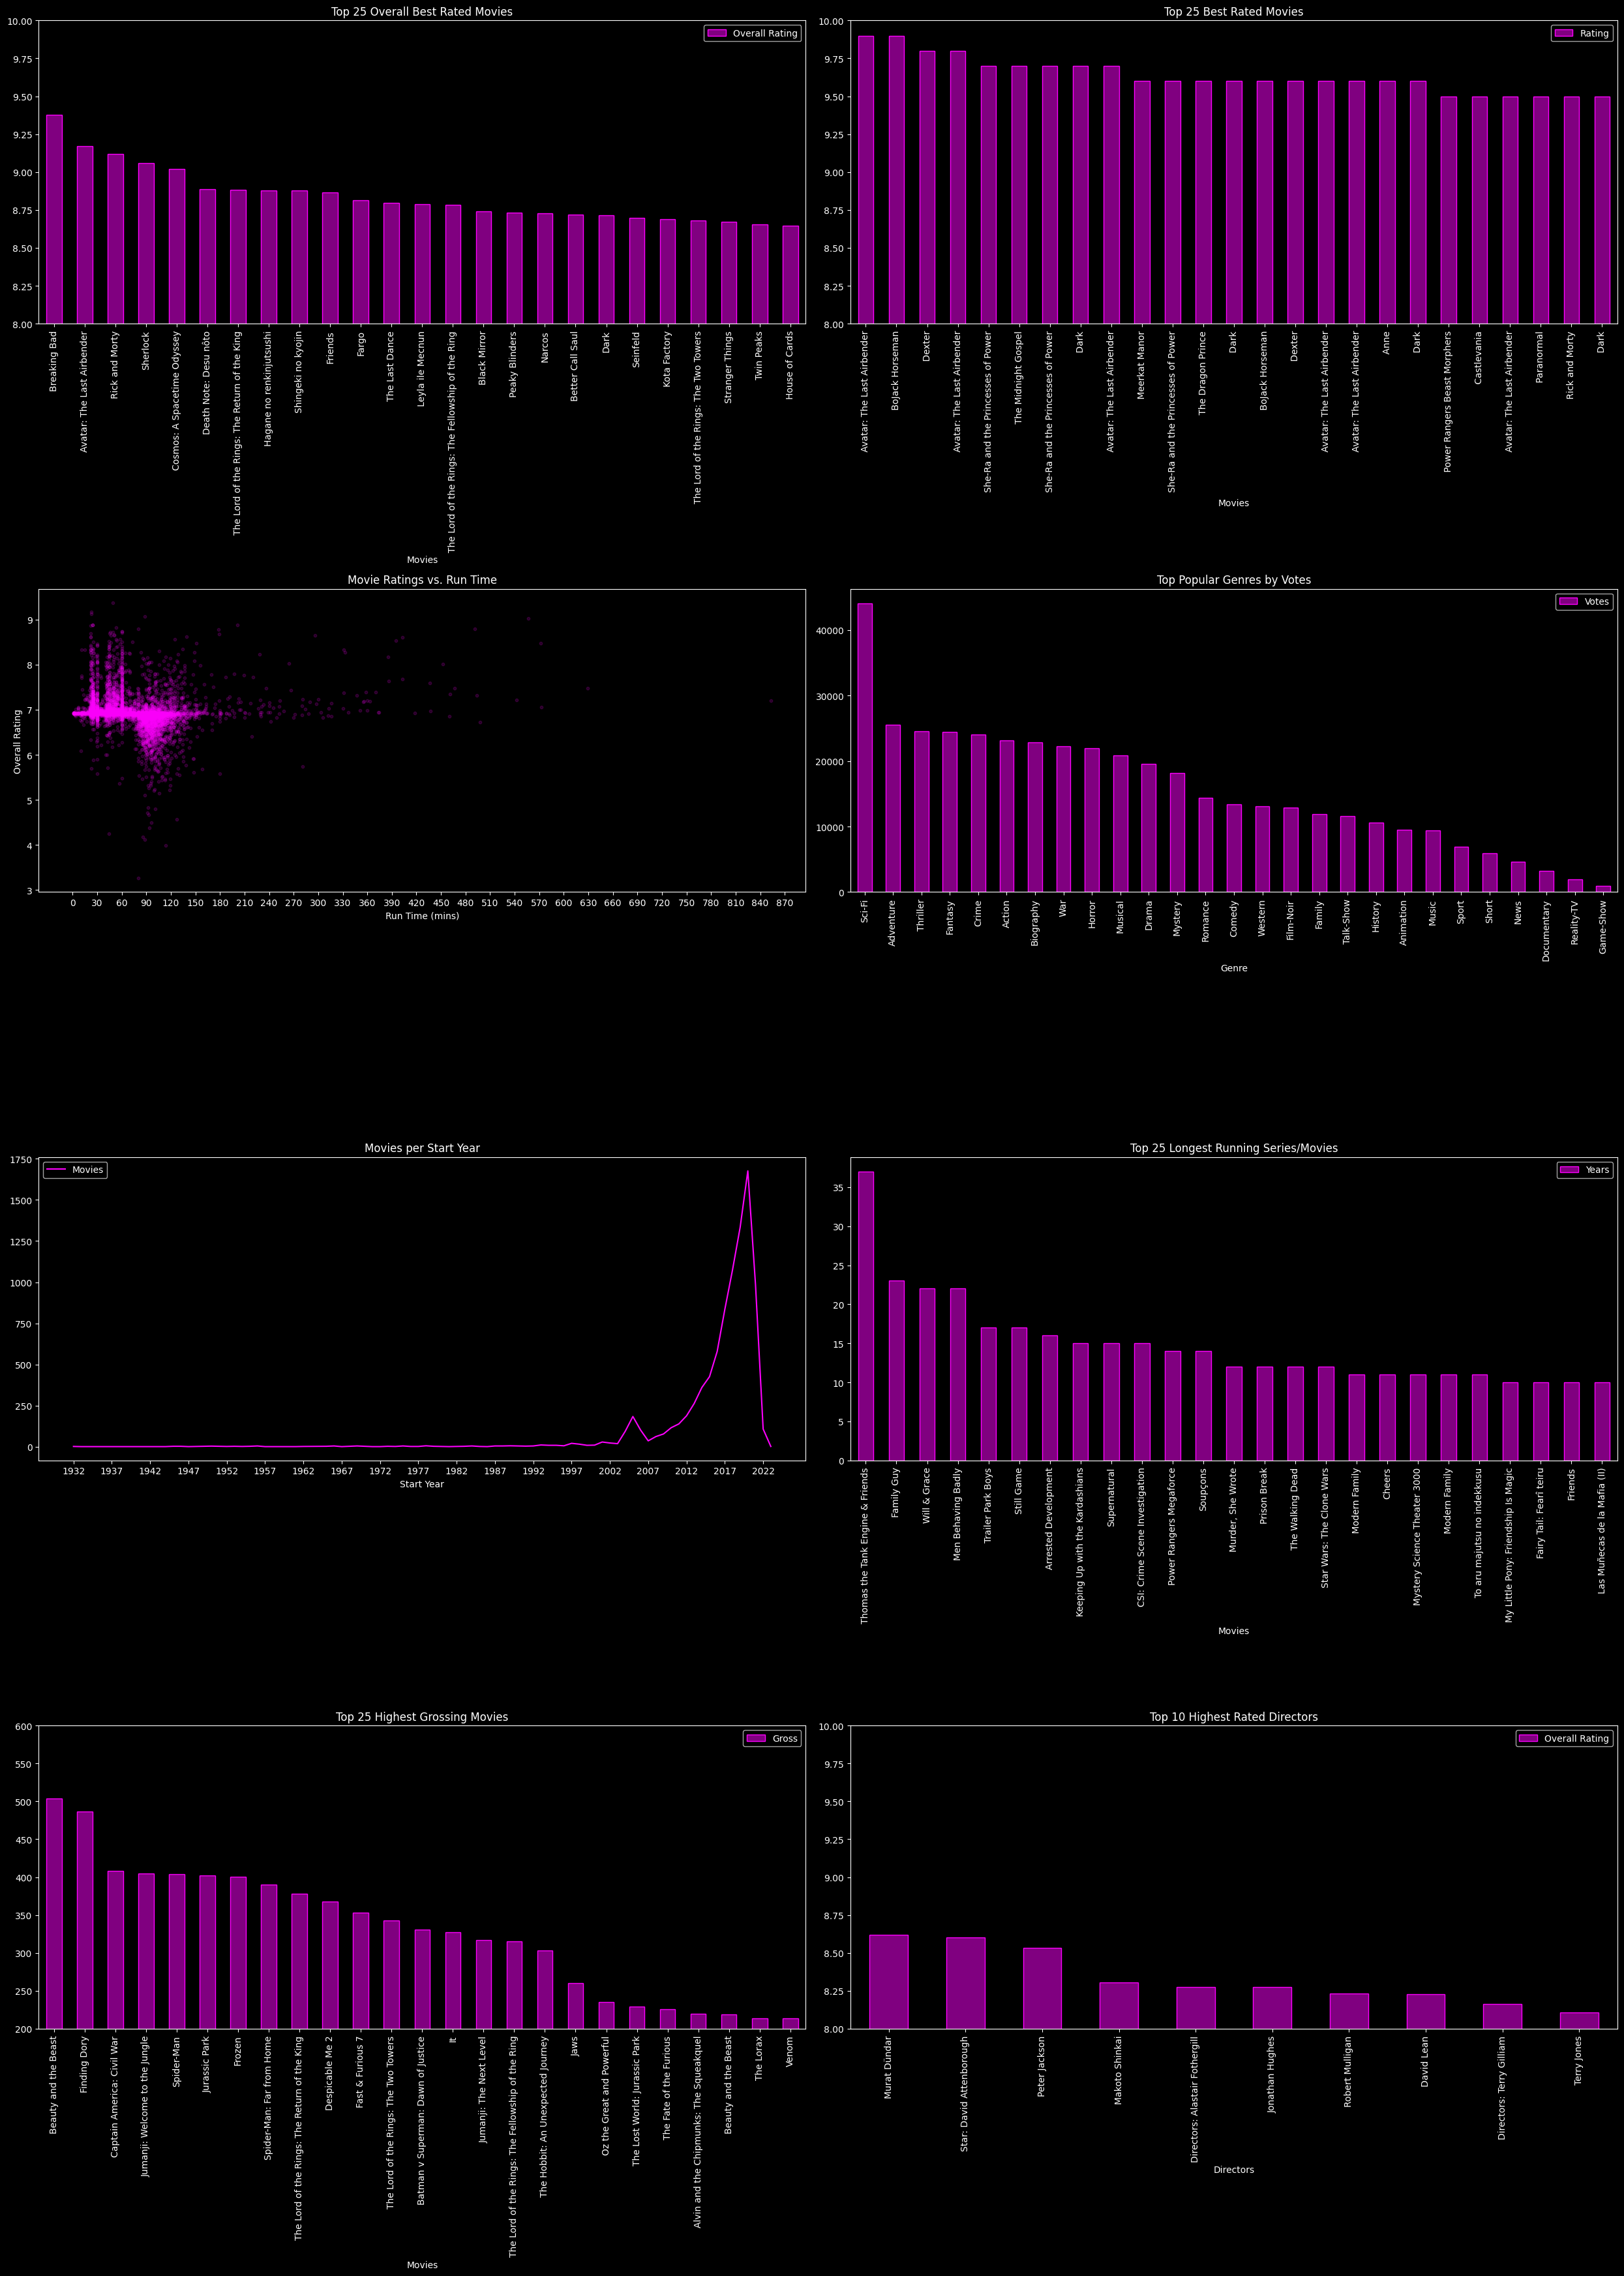

In [171]:
# Plot all graphs
fig, axs = plt.subplots(4, 2, figsize=(25, 35))
axs = axs.flatten()

# Reuse original plotting logic but direct to each subplot axis

df_view_1.head(25).plot(kind='bar', x='Movies', y='Overall Rating', ylim=(8, 10), color='purple', edgecolor='magenta', ax=axs[0], title='Top 25 Overall Best Rated Movies')
df_view_2.head(25).plot(kind='bar', x='Movies', y='Rating', ylim=(8, 10), color='purple', edgecolor='magenta', ax=axs[1], title='Top 25 Best Rated Movies')

axs[2].scatter(df_view_3['Run Time'], df_view_3['Overall Rating'],
               alpha=0.15, s=10, color='magenta')
axs[2].set_title('Movie Ratings vs. Run Time')
axs[2].set_xlabel('Run Time (mins)')
axs[2].set_ylabel('Overall Rating')
axs[2].set_xticks([i for i in range(0, 900, 30)])

df_view_4.plot(kind='bar', x='Genre', y='Votes', color='purple', edgecolor='magenta', ax=axs[3], title='Top Popular Genres by Votes')
df_view_5.plot(x='Start Year', y='Movies', color='magenta', xticks=[i for i in range(1932, 2023, 5)], ax=axs[4], title='Movies per Start Year')
df_view_6.head(25).plot(kind='bar', x='Movies', y='Years', color='purple', edgecolor='magenta', ax=axs[5], title='Top 25 Longest Running Series/Movies')
df_view_7.head(25).plot(kind='bar', x='Movies', y='Gross', ylim=(200, 600), color='purple', edgecolor='magenta', title='Top 25 Highest Grossing Movies', ax=axs[6])
df_view_8.head(10).plot(kind='bar', x='Directors', y='Overall Rating', ylim=(8, 10), color='purple', edgecolor='magenta', title='Top 10 Highest Rated Directors', ax=axs[7])

plt.tight_layout()
plt.show()

In [168]:
for i, fig in enumerate(plots):
    fig.savefig(f'./Data/Data Graphs/plot_{i+1}.png', dpi=300, bbox_inches='tight')
plots = []